In [109]:
# === Loading Packages ===
using Sunny # The main package
using ProgressMeter  #Statistics, Formatting, StaticArrays, LinearAlgebra, DelimitedFiles, OffsetArrays, Random # Some useful peripheral packages
using GLMakie, Plots # Some useful plotting packages
using Statistics, Formatting, StaticArrays, LinearAlgebra, DelimitedFiles, OffsetArrays, JLD2, Random
Sunny.offline_viewers();

In [110]:
# === Define the crystal structure of BNZS by importing a cif file === 
xtal_BNZS = Crystal("BNZS_maddy.cif",symprec=0.001);
#display(xtal_BNZS);

In [111]:
xtal_Nd=subcrystal(xtal_BNZS, "Nd1",);

Site to be vacent:
1,2,7,8,9,10,15,16

In [112]:
# display("======== BNZS Exchange Ipnteractions to unknown Neighbor ========")
#print_symmetry_table(xtal_Nd,7.5); # Print g-factor of Cr site and exchange interactions to distance of 6.0Å

In [113]:
L = 4
k = 1
gtensorplus=[0.85 -3.68 0;0.85 3.68 0; 0 0 0.0] #parallel to field
gtensorminus=[0.85 3.68 0;-0.85 3.68 0; 0 0 0.0] #perp to field

sys = System(xtal_Nd, (L,L,k), [SpinInfo(1, S=1/2)], :SUN, units=Units.meV, seed=2)
enable_dipole_dipole!(sys)

In [114]:
print_bond(xtal_Nd, Bond(3, 6, [0, 0, 0]))

Bond(3, 6, [0, 0, 0])
Distance 3.5100130645547, coordination 1
Connects 'Nd1' at [0.4208, 0.1708, 0] to 'Nd1' at [0.5792, 0.3292, 0]
Allowed exchange matrix: | A  D  0 |
                         | D  B  0 |
                         | 0  0  C |



In [115]:
# symmetry_equivalent_bonds(sys, Bond(3, 6, [0, 0, 0]))

In [116]:
set_exchange!(sys,[-0.6 0.0 0.0;
                   0.0  0.0 0.0;
                    0.0  0.0 0.0], Bond(3, 6, [0, 0, 0])) #FE interactions


set_exchange!(sys,[0.6  0.0 0.0;
                   0.0  0.0 0.0;
                   0.0  0.0 0.0], Bond(3, 5, [0, 0, 0])) #AF interactions

set_exchange!(sys,[0.6  0.0 0.0;
                   0.0  0.0 0.0;
                   0.0  0.0 0.0], Bond(7, 10, [0, 0, 0])) #AF interactions

# set_exchange!(sys,[-0.2   0.00  0.00;
#                    -0.00  -0.2  0.00;
#                    -0.00  -0.00 -0.00], Bond(1, 19, [0, 0, 0])) #FE interactions

In [117]:
polarize_spins!(sys, (1,-1,0))
for i in range(start = 1, stop=L, step=1)
    for j in range(start = 1, stop=L, step=1)
        for k in range(start = 1, stop=k, step=1)
            polarize_spin!(sys,(-1,1,0),(i,j,k,3))
            polarize_spin!(sys,(-1,1,0),(i,j,k,6))
            polarize_spin!(sys,(-1,1,0),(i,j,k,12))
            polarize_spin!(sys,(-1,1,0),(i,j,k,13))
                            
            polarize_spin!(sys,(1,1,0),(i,j,k,1))
            polarize_spin!(sys,(1,1,0),(i,j,k,8))
            polarize_spin!(sys,(1,1,0),(i,j,k,10))
            polarize_spin!(sys,(1,1,0),(i,j,k,15))
                            
            polarize_spin!(sys,(-1,-1,0),(i,j,k,2))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,7))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,9))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,16))
#Layer2
            polarize_spin!(sys,(-1,1,0),(i,j,k,17))
            polarize_spin!(sys,(-1,1,0),(i,j,k,24))
            polarize_spin!(sys,(-1,1,0),(i,j,k,26))
            polarize_spin!(sys,(-1,1,0),(i,j,k,31))
            
            polarize_spin!(sys,(1,1,0),(i,j,k,19))
            polarize_spin!(sys,(1,1,0),(i,j,k,22))
            polarize_spin!(sys,(1,1,0),(i,j,k,28))
            polarize_spin!(sys,(1,1,0),(i,j,k,29))
                            
            polarize_spin!(sys,(-1,-1,0),(i,j,k,20))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,21))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,27))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,30))
        end
    end
end

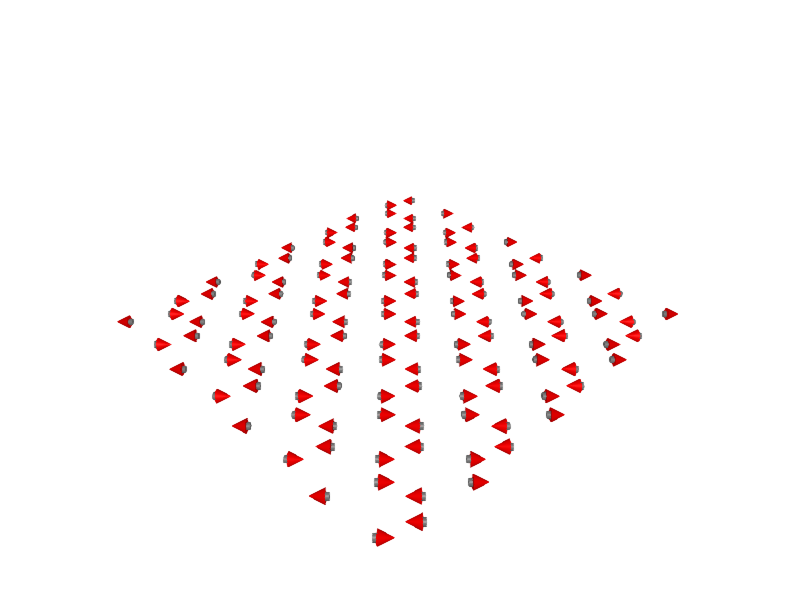

In [118]:
sys=to_inhomogeneous(sys)
for i in range(start = 1, stop=L, step=1)
    for j in range(start = 1, stop=L, step=1)
        for k in range(start = 1, stop=k, step=1)
             set_vacancy_at!(sys,(i,j,k,1))
             set_vacancy_at!(sys,(i,j,k,2))
#             set_vacancy_at!(sys,(i,j,k,3))
#             set_vacancy_at!(sys,(i,j,k,4))
#             set_vacancy_at!(sys,(i,j,k,5))
#             set_vacancy_at!(sys,(i,j,k,6))
             set_vacancy_at!(sys,(i,j,k,7))
             set_vacancy_at!(sys,(i,j,k,8))
             set_vacancy_at!(sys,(i,j,k,9))
             set_vacancy_at!(sys,(i,j,k,10))
#             set_vacancy_at!(sys,(i,j,k,11))
#             set_vacancy_at!(sys,(i,j,k,12))
#             set_vacancy_at!(sys,(i,j,k,13))
#             set_vacancy_at!(sys,(i,j,k,14))
            set_vacancy_at!(sys,(i,j,k,15))
             set_vacancy_at!(sys,(i,j,k,16))
                        
           set_vacancy_at!(sys,(i,j,k,18)) 
            set_vacancy_at!(sys,(i,j,k,19))
            set_vacancy_at!(sys,(i,j,k,20))
            set_vacancy_at!(sys,(i,j,k,21))
            set_vacancy_at!(sys,(i,j,k,22))
           set_vacancy_at!(sys,(i,j,k,23))
           set_vacancy_at!(sys,(i,j,k,25))
            set_vacancy_at!(sys,(i,j,k,27))
            set_vacancy_at!(sys,(i,j,k,28))
            set_vacancy_at!(sys,(i,j,k,29))
            set_vacancy_at!(sys,(i,j,k,30))
           set_vacancy_at!(sys,(i,j,k,32))
           set_vacancy_at!(sys,(i,j,k,17))
           set_vacancy_at!(sys,(i,j,k,24))
           set_vacancy_at!(sys,(i,j,k,26))
           set_vacancy_at!(sys,(i,j,k,31))
        end
    end
end

plot_spins(sys,arrowlength=1, linewidth=1, arrowsize=2.0)

In [119]:
B=0
set_external_field!(sys, (sqrt(B/2),-sqrt(B/2),0))

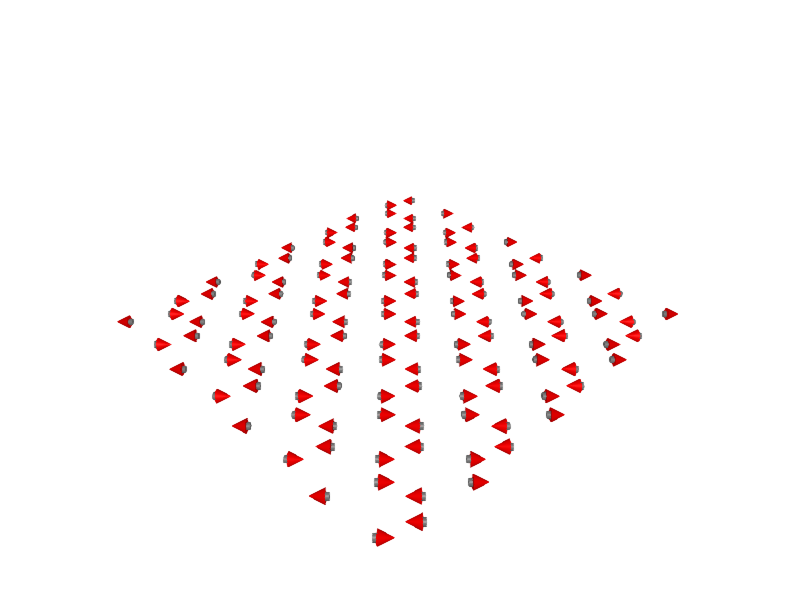

In [120]:
kT=0.025
sampler = LocalSampler(;kT, propose=propose_flip)
nsweeps=10000
x=range(1,stop=nsweeps,step=1)
m=[]
for i in 1:nsweeps
    step!(sys, sampler)
end
plot_spins(sys,arrowlength=1, linewidth=1, arrowsize=2.0)

Plots.heatmap(reshape([(s.x) for s in sys_fit.dipoles[:,:,1,1:16]], (16,16)))

In [121]:
# Make a `StructureFactor` and calculate an initial sample
sf = DynamicStructureFactor(sys; Δt=0.01, ωmax=3.0, nω=100);

In [122]:
# qs = [ [1, 1, 0]]
# is = intensities(sf, qs, :perp)

# fig = Figure()
# ax = Axis(fig[1,1]; xlabel="meV", ylabel="Intensity")
# l1 = lines!(ax, ωs(sf), is[1,:])
# Legend(fig[1,2], [l1], ["first"])
# fig

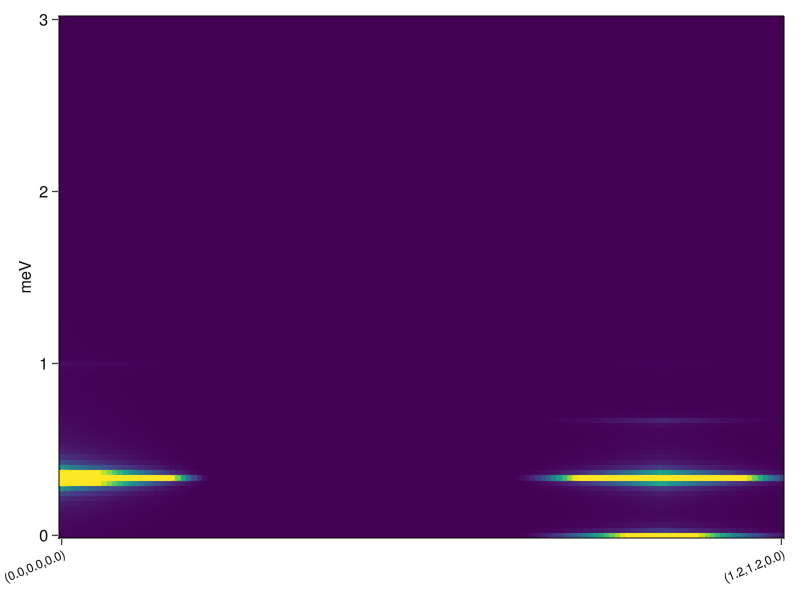

In [123]:
points = [[0,   0, 0],  # List of wave vectors that define a path
          [1.2,   1.2, 0],]
density = 80
path, markers = connected_path(points, density);

formfactors = [FormFactor(1, "Nd3"; g_lande=0.78)]
is = intensities(sf, path, :perp;
    interpolation = :linear,       # Interpolate between available wave vectors
    kT,                            # Temperature for intensity correction
    formfactors,                   # Form factor information
)
is = broaden_energy(sf, is, (ω, ω₀)->lorentzian(ω-ω₀, 0.01))  # Add artificial broadening

labels = ["($(p[1]),$(p[2]),$(p[3]))" for p in points]

GLMakie.heatmap(1:size(is,1), ωs(sf), is;
    colorrange=(0, 50),
    axis = (
        ylabel = "meV",
        xticks = (markers, labels),
        xticklabelrotation=π/8,
        xticklabelsize=12,
    )
)